In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import src.data_handler as data_handler
import src.models as models
import os
from IPython.display import display

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

CANTIDAD_DE_CLASES = 48

X_images : np.ndarray[float] = np.load(f"{project_root}/TP03/data/X_images.npy")
y_images : np.ndarray[float] = np.load(f"{project_root}/TP03/data/y_images.npy")

np.random.seed(42)

In [2]:
def get_image_by_index(index : int, dataset : np.ndarray[float]) -> np.ndarray[float]:
    return dataset[index].reshape(28 ,28)

## 1 ) Análisis y preprocesamiento de datos

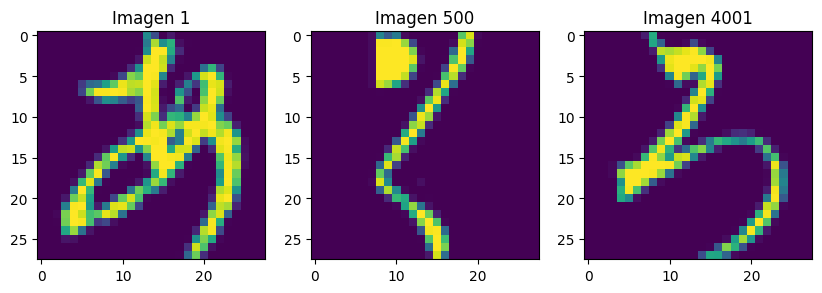

In [3]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.title(f"Imagen {1}")
plt.imshow(get_image_by_index(1, X_images), aspect='equal')
plt.subplot(1, 3, 2)
plt.title(f"Imagen {500}")
plt.imshow(get_image_by_index(500, X_images), aspect='equal')
plt.subplot(1, 3, 3)
plt.title(f"Imagen {4001}")
plt.imshow(get_image_by_index(4001, X_images), aspect='equal')
plt.show() 

# plt.figure(figsize=(4, 4))
# plt.imshow(get_image_by_index(1, X_images), aspect='equal')
# # plt.title("Imagen 1")
# plt.savefig("imagen_1.png")
# plt.close()

# plt.figure(figsize=(4, 4))
# plt.imshow(get_image_by_index(500, X_images), aspect='equal')
# # plt.title("Imagen 500")
# plt.savefig("imagen_500.png")
# plt.close()

# plt.figure(figsize=(4, 4))
# plt.imshow(get_image_by_index(4001, X_images), aspect='equal')
# # plt.title("Imagen 4001")
# plt.savefig("imagen_4001.png")
# plt.close()

In [4]:
print("X_images.info()")
display(pd.DataFrame(X_images).info())
print("y_images.info()")
display(pd.DataFrame(y_images).info())

X_images.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 784 entries, 0 to 783
dtypes: float32(784)
memory usage: 15.0 MB


None

y_images.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       5000 non-null   int64
dtypes: int64(1)
memory usage: 39.2 KB


None

In [5]:
# Qué es y?

print("\'y_images\'")
print("")
print("Valores del dataset original : ", y_images)
print("Cantidad de valores únicos   : ", len(set(y_images)))
print("")
# Valores que abarcan de 0 al 48, representando cada una de las clases.

# Queremos una representación de 'y' con un esquema de one-hot-encoding
# Cada fila es una muestra, cada muestra es de una clase
y_images = np.array([[0 if y_images[x] != i else 1 for i in range(CANTIDAD_DE_CLASES)] for x in range(len(X_images))], dtype=float)
print("ONE-HOT")
print(y_images)


'y_images'

Valores del dataset original :  [ 0  0  0 ... 25 18 28]
Cantidad de valores únicos   :  49

ONE-HOT
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
X_images = X_images / 255
X_train : pd.DataFrame
X_validation : pd.DataFrame
X_test : pd.DataFrame
X_train, X_validation, X_test, Y_train, Y_validation, Y_test = data_handler.get_splitted_dataset(pd.DataFrame(X_images), pd.DataFrame(y_images))
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_validation.shape)
print(Y_test.shape)

(4000, 784)
(750, 784)
(250, 784)
(4000, 48)
(750, 48)
(250, 48)


## 2 ) Implementación y Entrenamiento de una Red Neuronal Básica

In [7]:
M0 : models.RedNeuronal = models.RedNeuronal([784,100,80,48], ['relu', 'relu', 'softmax'])
# print(X_images.shape)
M0.batch_gradient_descent(np.array(X_train), np.array(Y_train), epochs=250, learning_rate=(0.0001, 0.0001), print_results_rate=50)

Epoch 50
-> Loss = [1.94771532 1.31907467 0.79421368 ... 2.94688563 5.5727164  4.48845807]
-> Loss Mean = 1.9540800169707186
Epoch 100
-> Loss = [1.6397485  0.53475729 0.05343886 ... 2.65223856 6.0818294  2.71998771]
-> Loss Mean = 1.352418342186626
-> Difference = -0.6016616747840926
Epoch 150
-> Loss = [2.63411045 0.28627473 0.05354699 ... 1.16821027 4.84650615 2.14905963]
-> Loss Mean = 0.9884507929967806
-> Difference = -0.3639675491898454
Epoch 200
-> Loss = [0.44647635 0.65331545 0.05074117 ... 0.86352609 6.11513418 0.60692574]
-> Loss Mean = 0.7137470815922299
-> Difference = -0.27470371140455074
Epoch 250
-> Loss = [0.88248757 0.01931423 0.02437098 ... 0.50151988 4.8205823  0.80212655]
-> Loss Mean = 0.6507100079557079
-> Difference = -0.063037073636522


In [8]:
print(M0.pred.shape)
print("Accuracy Train = ", M0.get_train_accuracy(Y_train))
print("Accuracy Validation = ", M0.get_accuracy(Y_validation, pred=M0.get_prediction(X_validation)))
print("Accuracy Test = ", M0.get_accuracy(Y_test, pred=M0.get_prediction(X_test)))

(4000, 48)
Accuracy Train =  0.806
Accuracy Validation =  0.5906666666666667
Accuracy Test =  0.572


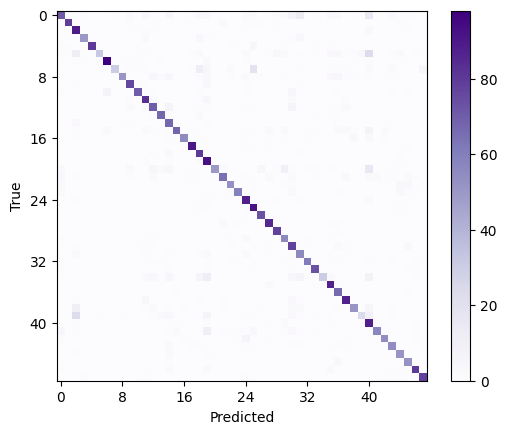

In [9]:
cm : np.ndarray = M0.get_train_confusion_matrix(Y_train)
plt.imshow(cm, cmap='Purples')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.title('Confusion Matrix')
plt.xticks(range(0, cm.shape[0], 8))
plt.yticks(range(0, cm.shape[0], 8))
plt.show()